# Augmentation de data spectogramme

In [41]:
from microfaune import audio, plot

from keras.preprocessing.image import ImageDataGenerator

# Audio preprocessing

### Sound examples

In [42]:

s, data = audio.load_wav("../toy_data/bird1.wav")


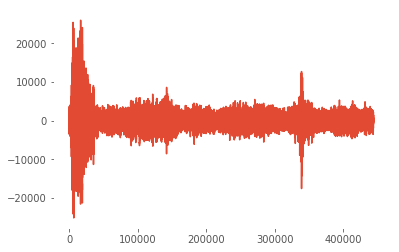

In [43]:
plt.plot(data)

## Creating MEL spectrograms

In [44]:
fs = 44100
# From Cakir
N_MELS = 40

# MEL spec from STFT 40 ms and 20 ms overlap
N_FFT = int(0.04 * fs) + 1
HOP_LEN = int(0.02 * fs) + 1

In [45]:
S = audio.create_spec(data[:(44100 * 10)], fs, n_mels = N_MELS, n_fft = N_FFT, hop_len = HOP_LEN)

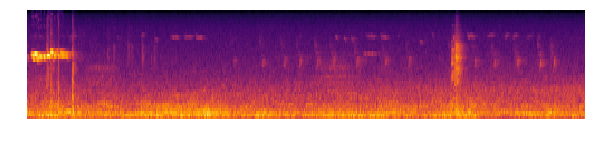

In [46]:
plot.plot_spec(S)

## Data spectogramme augmentation

In [47]:
def init_datagen(width_shift_range=[-40,40], horizontal_flip=True, brightness_range=[0.2,1.0]):
    """ initialisation des des générateurs d'augmentation """
    """ ces paramétrages seront à revoir à l'épreuve des tests """
    """ input: width_shift_range, horizontal_flip, brightness_range"""
    """ output: three datagenerator """
    #print(width_shift_range, horizontal_flip, brightness_range)
    
    datagen_width_shift = ImageDataGenerator(width_shift_range=width_shift_range)    
    datagen_horizontal_flip = ImageDataGenerator(horizontal_flip=horizontal_flip)    
    datagen_brightness = ImageDataGenerator(brightness_range=brightness_range)    
    return [datagen_width_shift, datagen_horizontal_flip, datagen_brightness]
    

def datagen_augmentation(datagen_list, S, y, my_range=5, to_display=False):
    """ augmentation """
    """ input: S= 1 spectogramme """
    """ inpout: y du spectograme """
    """ output: list od new Spectograms with Y list (duplicate from y input)"""
    """ notice that thet spectrogram given in input isn't in the output list """
    
    """ by default 5 spectogram wiht 3 genetors will produde 15 spectograms """
    
    list_S = []
    list_y = []
    for datagen in datagen_list:
        data = np.expand_dims(S, axis=2) 

        # expand dimension to one sample
        samples = expand_dims(data, 0) 
        # prepare iterator
        it = datagen.flow(samples, batch_size=1)
        # generate samples and plot
        for i in range(my_range):
            batch = it.next()
            # convert to unsigned integers for viewing
            image = batch[0].astype('uint8')
            image = image[:,:,0]
            list_S.append(image)
            list_y.append(y)
            if to_display==True:
                plot.plot_spec(image)
    return list_S, list_y


#### Test data augmentation of one spectogram, and plot generated spectograms   

--> 15  new spectograms generated


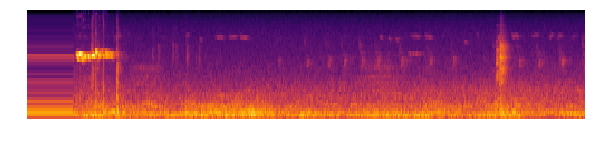

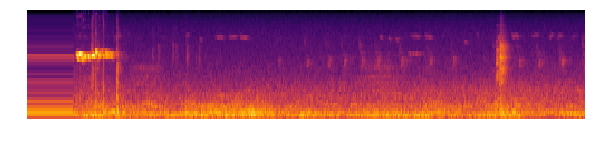

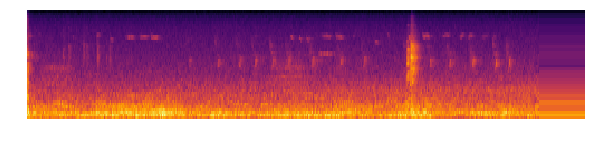

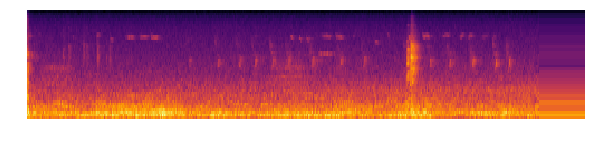

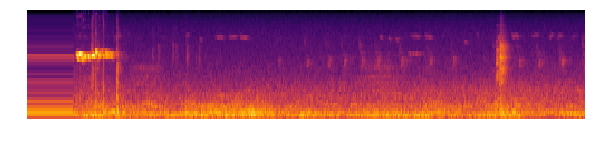

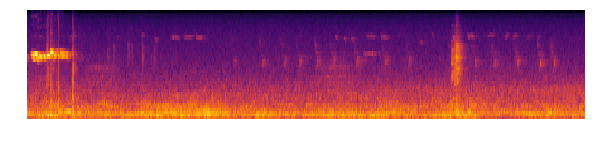

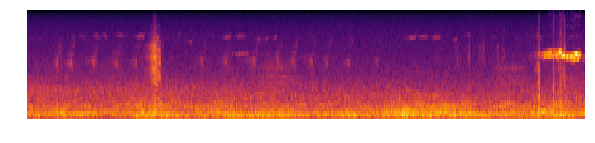

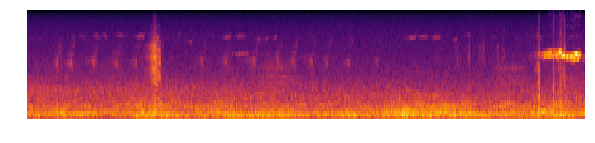

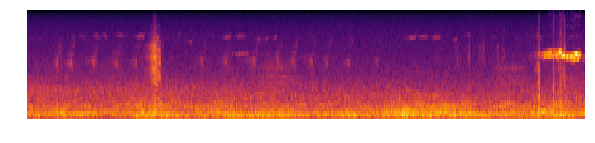

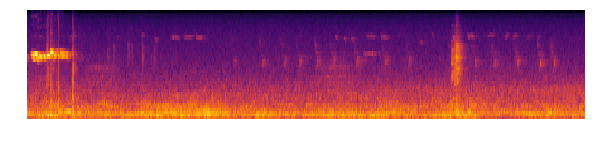

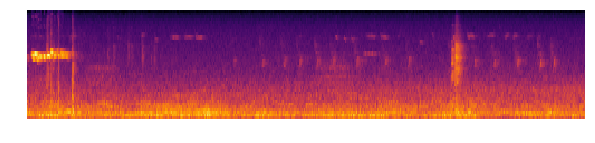

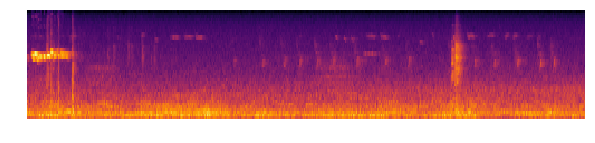

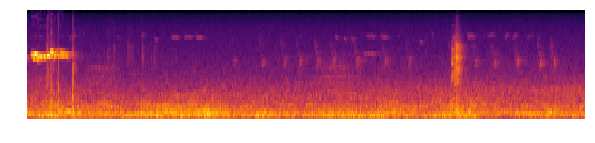

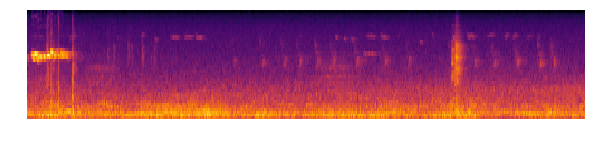

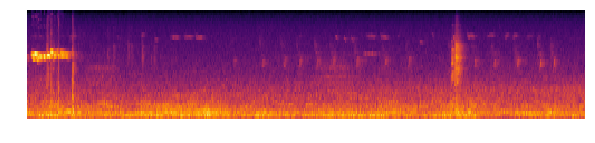

In [48]:
def datagen_test(S):
    """ test data augmentation on one spectogram """
    datagen_list = init_datagen() #intialize data generators list
    y = 1 
    list_S, list_y = datagen_augmentation(datagen_list, S, y, 5, True)
    print('-->',len(list_S), ' new spectograms generated')
    
datagen_test(S)    
